<a href="https://colab.research.google.com/github/kothawadegs/Deep-Learning/blob/master/S9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [21]:
%cd /content/gdrive/My Drive/TSAI_EVA_4.0

/content/gdrive/My Drive/TSAI_EVA_4.0


In [0]:
%matplotlib inline
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import albumentations

In [24]:
cd Transform_utils


/content/gdrive/My Drive/TSAI_EVA_4.0/Transform_utils


In [25]:
from transform_album  import Data
data = Data()
trainset = data.getTrainDataSet(train=True)
trainset1 = data.getTrainDataSet(train=True)
testset =  data.getTrainDataSet(train=False)
trainloader = data.getDataLoader(trainset, 128)
trainloader1 = data.getDataLoader(trainset, 4)
testloader = data.getDataLoader(testset, 128)
testloader1 = data.getDataLoader(testset, 4)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


plane   dog  deer  deer


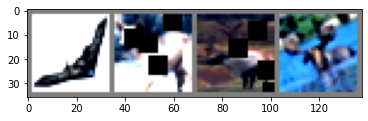

In [26]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# get some random training images
dataiter = iter(trainloader1)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [31]:
cd ..

/content/gdrive/My Drive/TSAI_EVA_4.0


In [32]:
from Model import resnet
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
net = resnet.ResNet18().to(device)
summary(net, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
           Dropout-5           [-1, 64, 32, 32]               0
            Conv2d-6           [-1, 64, 32, 32]          36,864
       BatchNorm2d-7           [-1, 64, 32, 32]             128
        BasicBlock-8           [-1, 64, 32, 32]               0
            Conv2d-9           [-1, 64, 32, 32]          36,864
      BatchNorm2d-10           [-1, 64, 32, 32]             128
          Dropout-11           [-1, 64, 32, 32]               0
           Conv2d-12           [-1, 64, 32, 32]          36,864
      BatchNorm2d-13           [-1, 64, 32, 32]             128
       BasicBlock-14           [-1

In [33]:
from Model import resnet
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
net = resnet.ResNet18().to(device)
summary(net, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
           Dropout-5           [-1, 64, 32, 32]               0
            Conv2d-6           [-1, 64, 32, 32]          36,864
       BatchNorm2d-7           [-1, 64, 32, 32]             128
        BasicBlock-8           [-1, 64, 32, 32]               0
            Conv2d-9           [-1, 64, 32, 32]          36,864
      BatchNorm2d-10           [-1, 64, 32, 32]             128
          Dropout-11           [-1, 64, 32, 32]               0
           Conv2d-12           [-1, 64, 32, 32]          36,864
      BatchNorm2d-13           [-1, 64, 32, 32]             128
       BasicBlock-14           [-1

In [0]:
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
import torch.nn as nn
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9, weight_decay=0.0001)
#scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=0.001, max_lr=0.1)
scheduler = StepLR(optimizer, step_size=10, gamma=0.5)

In [35]:
import torch
from tqdm import tqdm
import train
import test
test_acc = []
train_acc = []
for epoch in range(30):  # loop over the dataset multiple times
    if epoch>10:
      scheduler.step()
    for param_group in optimizer.param_groups:
      print("lr= ",param_group['lr'])
    train_acc.append(train.train(net, device, trainloader, optimizer, criterion, epoch))
    test_acc.append(test.test(net, device, testloader))
print('Finished Training')

  0%|          | 0/391 [00:00<?, ?it/s]

lr=  0.1


Epoch= 0 Loss=1.750194787979126 Batch_id=390 Accuracy=36.25: 100%|██████████| 391/391 [00:39<00:00,  9.79it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 31 %
lr=  0.1


Epoch= 1 Loss=1.7036939859390259 Batch_id=390 Accuracy=37.50: 100%|██████████| 391/391 [00:40<00:00,  9.75it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 37 %
lr=  0.1


Epoch= 2 Loss=1.4778461456298828 Batch_id=390 Accuracy=50.00: 100%|██████████| 391/391 [00:39<00:00,  9.80it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 46 %
lr=  0.1


Epoch= 3 Loss=1.2595908641815186 Batch_id=390 Accuracy=55.00: 100%|██████████| 391/391 [00:40<00:00,  9.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 52 %
lr=  0.1


Epoch= 4 Loss=1.5136775970458984 Batch_id=390 Accuracy=55.00: 100%|██████████| 391/391 [00:40<00:00,  9.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 57 %
lr=  0.1


Epoch= 5 Loss=0.8983296155929565 Batch_id=390 Accuracy=80.00: 100%|██████████| 391/391 [00:39<00:00,  9.81it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 61 %
lr=  0.1


Epoch= 6 Loss=1.050767183303833 Batch_id=390 Accuracy=65.00: 100%|██████████| 391/391 [00:39<00:00,  9.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 64 %
lr=  0.1


Epoch= 7 Loss=0.8230368494987488 Batch_id=390 Accuracy=76.25: 100%|██████████| 391/391 [00:40<00:00,  9.72it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 67 %
lr=  0.1


Epoch= 8 Loss=1.0504950284957886 Batch_id=390 Accuracy=67.50: 100%|██████████| 391/391 [00:40<00:00,  9.75it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 69 %
lr=  0.1


Epoch= 9 Loss=0.6370409727096558 Batch_id=390 Accuracy=83.75: 100%|██████████| 391/391 [00:39<00:00,  9.84it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 71 %
lr=  0.1


Epoch= 10 Loss=0.8727256059646606 Batch_id=390 Accuracy=81.25: 100%|██████████| 391/391 [00:39<00:00,  9.83it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 73 %
lr=  0.1


Epoch= 11 Loss=0.7630186080932617 Batch_id=390 Accuracy=73.75: 100%|██████████| 391/391 [00:40<00:00,  9.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 74 %
lr=  0.1


Epoch= 12 Loss=0.7280974984169006 Batch_id=390 Accuracy=82.50: 100%|██████████| 391/391 [00:40<00:00,  9.70it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 76 %
lr=  0.1


Epoch= 13 Loss=0.5535972118377686 Batch_id=390 Accuracy=87.50: 100%|██████████| 391/391 [00:40<00:00,  9.76it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 76 %
lr=  0.1


Epoch= 14 Loss=0.4288862645626068 Batch_id=390 Accuracy=88.75: 100%|██████████| 391/391 [00:39<00:00,  9.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 77 %
lr=  0.1


Epoch= 15 Loss=0.47474098205566406 Batch_id=390 Accuracy=91.25: 100%|██████████| 391/391 [00:40<00:00,  9.73it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 79 %
lr=  0.1


Epoch= 16 Loss=0.7296023368835449 Batch_id=390 Accuracy=82.50: 100%|██████████| 391/391 [00:39<00:00,  9.84it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 77 %
lr=  0.1


Epoch= 17 Loss=0.39828380942344666 Batch_id=390 Accuracy=90.00: 100%|██████████| 391/391 [00:39<00:00,  9.79it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 79 %
lr=  0.1


Epoch= 18 Loss=0.8362177014350891 Batch_id=390 Accuracy=77.50: 100%|██████████| 391/391 [00:40<00:00,  9.68it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 80 %
lr=  0.1


Epoch= 19 Loss=0.6786860823631287 Batch_id=390 Accuracy=80.00: 100%|██████████| 391/391 [00:40<00:00,  9.77it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 80 %
lr=  0.05


Epoch= 20 Loss=0.31484270095825195 Batch_id=390 Accuracy=96.25: 100%|██████████| 391/391 [00:40<00:00,  9.66it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84 %
lr=  0.05


Epoch= 21 Loss=0.2638016641139984 Batch_id=390 Accuracy=90.00: 100%|██████████| 391/391 [00:40<00:00,  9.64it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84 %
lr=  0.05


Epoch= 22 Loss=0.43531090021133423 Batch_id=390 Accuracy=86.25: 100%|██████████| 391/391 [00:40<00:00,  9.64it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84 %
lr=  0.05


Epoch= 23 Loss=0.31515616178512573 Batch_id=390 Accuracy=92.50: 100%|██████████| 391/391 [00:40<00:00,  9.67it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84 %
lr=  0.05


Epoch= 24 Loss=0.21358494460582733 Batch_id=390 Accuracy=93.75: 100%|██████████| 391/391 [00:40<00:00,  9.70it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84 %
lr=  0.05


Epoch= 25 Loss=0.27064067125320435 Batch_id=390 Accuracy=90.00: 100%|██████████| 391/391 [00:40<00:00,  9.76it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84 %
lr=  0.05


Epoch= 26 Loss=0.22021682560443878 Batch_id=390 Accuracy=95.00: 100%|██████████| 391/391 [00:39<00:00,  9.83it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85 %
lr=  0.05


Epoch= 27 Loss=0.30512791872024536 Batch_id=390 Accuracy=95.00: 100%|██████████| 391/391 [00:39<00:00,  9.84it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85 %
lr=  0.05


Epoch= 28 Loss=0.3690081238746643 Batch_id=390 Accuracy=91.25: 100%|██████████| 391/391 [00:39<00:00,  9.80it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84 %
lr=  0.05


Epoch= 29 Loss=0.18706464767456055 Batch_id=390 Accuracy=93.75: 100%|██████████| 391/391 [00:40<00:00,  9.68it/s]
100%|██████████| 79/79 [00:04<00:00, 18.69it/s]

Accuracy of the network on the 10000 test images: 84 %
Finished Training


Text(0, 0.5, 'Accuracy')

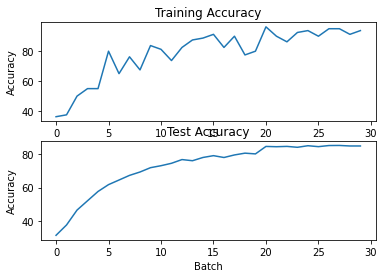

In [36]:

import matplotlib.pyplot as plt

fig, axs = plt.subplots(2)
axs[0].plot(train_acc)
axs[0].set_title("Training Accuracy")
axs[0].set_xlabel("Batch")
axs[0].set_ylabel("Accuracy")
axs[1].plot(test_acc) 
axs[1].set_title("Test Accuracy")
axs[1].set_xlabel("Batch")
axs[1].set_ylabel("Accuracy")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


GroundTruth:   bird  bird  bird   dog


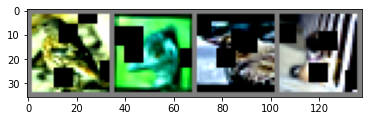

In [37]:
dataiter = iter(testloader1)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [38]:
test.test_categorywise(net, device, testloader, classes)

100%|██████████| 79/79 [00:04<00:00, 18.44it/s]

Accuracy of plane : 87 %
Accuracy of   car : 89 %
Accuracy of  bird : 75 %
Accuracy of   cat : 71 %
Accuracy of  deer : 82 %
Accuracy of   dog : 60 %
Accuracy of  frog : 87 %
Accuracy of horse : 86 %
Accuracy of  ship : 96 %
Accuracy of truck : 91 %


In [39]:
testset =  data.getTrainDataSet(train=False)
testloader2 = data.getGradCamDataLoader(testset)
it = iter(testloader2)

Extracting ./data/cifar-10-python.tar.gz to ./data


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


bird


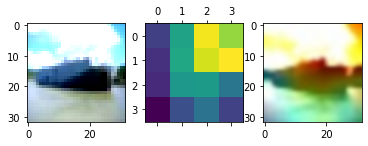

In [40]:
import gradcam
img,_ = next(it)
gradcam.gradcamof(net, img, classes)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


truck


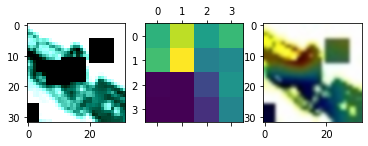

In [41]:
img,_ = next(it)
gradcam.gradcamof(net, img, classes)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


car


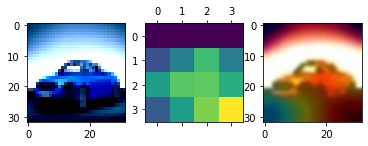

In [42]:
img,_ = next(it)
gradcam.gradcamof(net, img, classes)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


frog


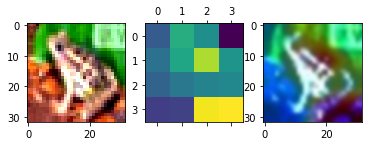

In [43]:
img,_ = next(it)
gradcam.gradcamof(net, img, classes)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dog


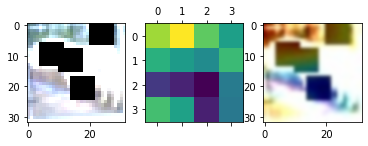

In [44]:
img,_ = next(it)
gradcam.gradcamof(net, img, classes)